## Insurance Claims- Fraud Detection 

### Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims.
### Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
### This is a classification problem

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [3]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [4]:
pd.set_option("display.max_rows", None, "display.max_columns", None)       # will display all the rows and columns:

In [5]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
df.shape

(1000, 40)

In [8]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [9]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

In [10]:
#statistics for the object columns--

df.describe(include='O').T

count unique                      top freq
policy_bind_date         1000    951               01-01-2006    3
policy_state             1000      3                       OH  352
policy_csl               1000      3                  250/500  351
insured_sex              1000      2                   FEMALE  537
insured_education_level  1000      7                       JD  161
insured_occupation       1000     14        machine-op-inspct   93
insured_hobbies          1000     20                  reading   64
insured_relationship     1000      6                own-child  183
incident_date            1000     60               02-02-2015   28
incident_type            1000      4  Multi-vehicle Collision  419
collision_type           1000      4           Rear Collision  292
incident_severity        1000      4             Minor Damage  354
authorities_contacted    1000      5                   Police  292
incident_state           1000      7                       NY  262
incident_city            1000      7              Springfield  157
incident_location        1000   1000           9935 4th Drive    1
property_damage          1000      3                        ?  360
police_report_available  1000      3                        ?  343
auto_make                1000     14                     Saab   80
auto_model               1000     39                      RAM   43
fraud_reported           1000      2                        N  753

### EDA

In [11]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

<AxesSubplot:>

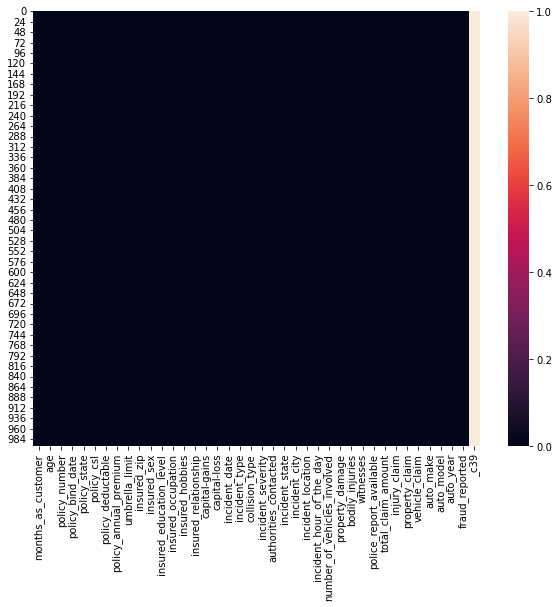

In [12]:
# Checking the null values using heatmap :
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

#### * c_39 column has all the null values present hence we should drop that column as it is of no use to us.

In [13]:
df.drop('_c39',axis=1,inplace=True)

df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [14]:
replace={}

for i in df.columns:
    if (df[i]).dtype=='object':
        find=np.sum(df[i]=='?')
        replace[i]=find
        
new=pd.DataFrame.from_dict(replace,orient='index')
print(new)

                           0
policy_bind_date           0
policy_state               0
policy_csl                 0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_date              0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
incident_location          0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0
fraud_reported             0


#### * So there are '?' present in 3 columns: collision_type, property_damage and police_report_available, hence we will deal with it

In [15]:
df['collision_type'] = df['collision_type'].replace('?',df['collision_type'].mode()[0])

In [16]:
df['collision_type'].value_counts()  # to check if '?' have been replaced :

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [17]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [18]:
df['property_damage']=df['property_damage'].replace('?','NO')

In [19]:
df['property_damage'].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

In [20]:
df['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [21]:
df['police_report_available']=df['police_report_available'].replace('?','NO')

In [22]:
df['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

In [23]:
print(df['policy_number'].nunique())

1000


In [24]:
# Checking for any wide space in the dataset:

In [25]:
replace={}

for i in df.columns:
    if (df[i]).dtype==" ":
        find=np.sum(df[i]==" ")
        replace[i]=find
        
new=pd.DataFrame.from_dict(replace,orient='index')
print(new)

Empty DataFrame
Columns: []
Index: []


#### * So there are no wide space present in the data set and we are good to proceed further as we have dealt with missing values :

In [26]:
numerical_columns=['months_as_customer','age','policy_deductable','policy_annual_premium','umbrella_limit','capital-gains','capital-loss',
                   'total_claim_amount','injury_claim','property_claim','vehicle_claim']


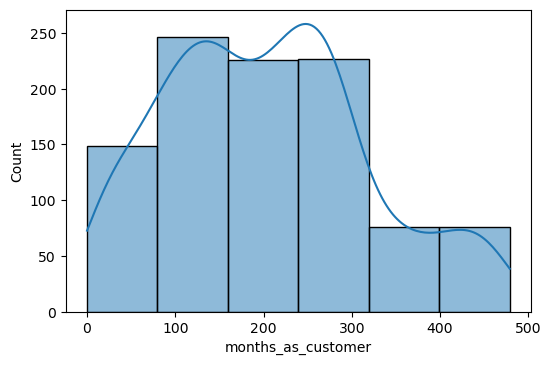

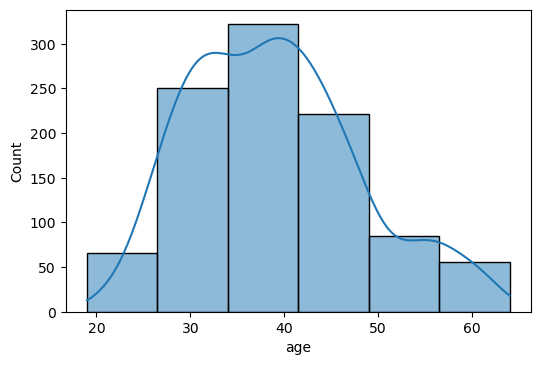

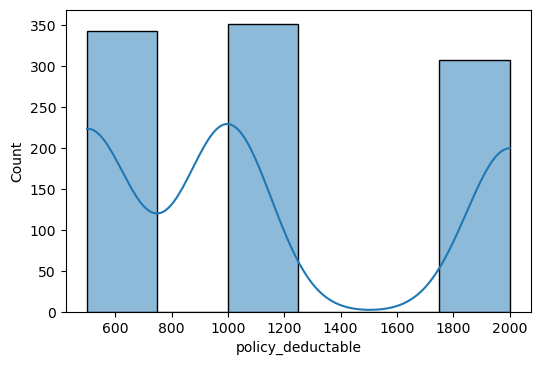

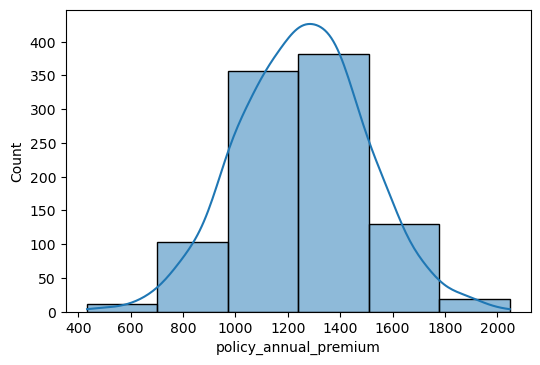

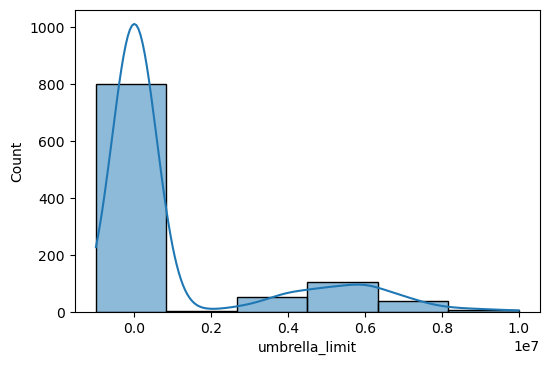

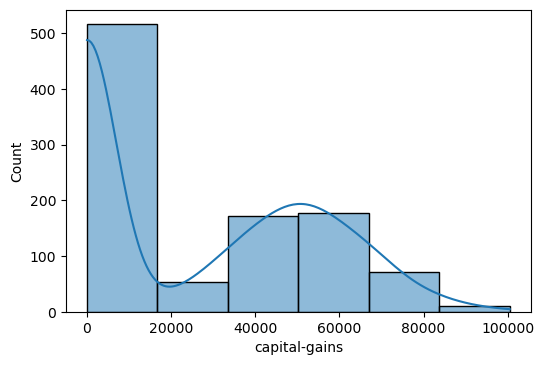

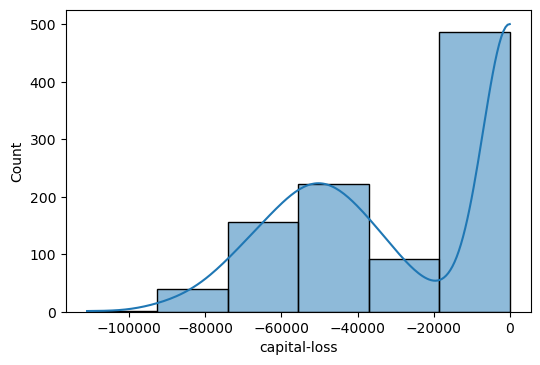

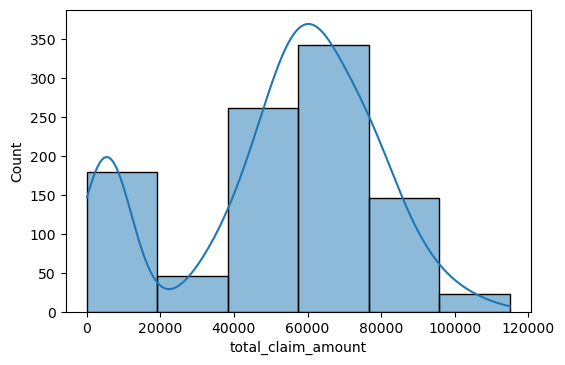

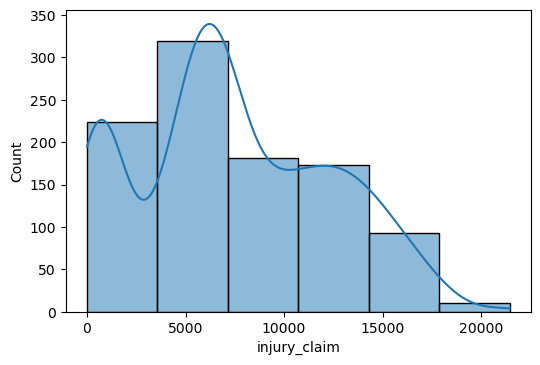

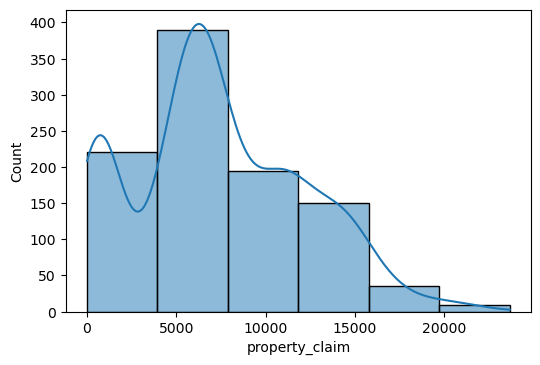

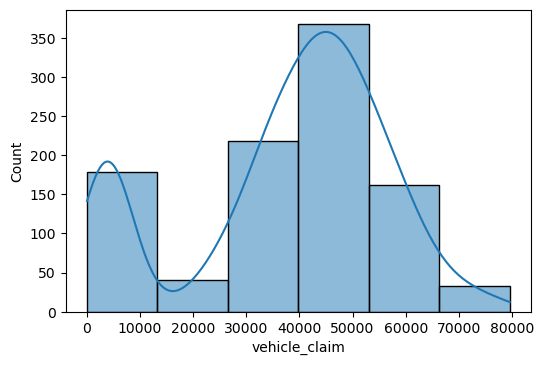

In [27]:
for i in numerical_columns:
    plt.figure(figsize=(6,4),dpi=100)
    sns.histplot(data=df,x=i,kde=True,bins=6)

### Bivariate analysis :

In [28]:
df.pivot_table(columns=['fraud_reported','insured_sex'],values='policy_number',aggfunc=['count']).T

policy_number
      fraud_reported insured_sex               
count N              FEMALE                 411
                     MALE                   342
      Y              FEMALE                 126
                     MALE                   121

In [29]:
print('percentage_of_females_doing_fraud: ',(126/(126+411))*100)
print('percentage_of_males_doing_fraud: ',(121/(121+342))*100)

percentage_of_females_doing_fraud:  23.463687150837988
percentage_of_males_doing_fraud:  26.13390928725702


#### * Males taking an insurance policy have a higher chance of doing fraud

In [30]:
df.pivot_table(columns=['fraud_reported','policy_state'],values='policy_number',aggfunc=['count']).T

policy_number
      fraud_reported policy_state               
count N              IL                      261
                     IN                      231
                     OH                      261
      Y              IL                       77
                     IN                       79
                     OH                       91

In [31]:
print('percentage_of_customers_doing_fraud_IL: ',(77/(77+261))*100)
print('percentage_of_customers_doing_fraud_IN: ',(79/(79+231))*100)
print('percentage_of_customers_doing_fraud_OH: ',(91/(91+261))*100)

percentage_of_customers_doing_fraud_IL:  22.781065088757398
percentage_of_customers_doing_fraud_IN:  25.483870967741932
percentage_of_customers_doing_fraud_OH:  25.85227272727273


#### * CUSTOMERS WITH POLICY STATE-OH HAS THE HIGHEST CHANCE OF DOING FRAUD

In [32]:
df.pivot_table(columns=['fraud_reported','policy_csl'],values='policy_number',aggfunc=['count']).T

policy_number
      fraud_reported policy_csl               
count N              100/300               259
                     250/500               259
                     500/1000              235
      Y              100/300                90
                     250/500                92
                     500/1000               65

In [33]:
print('percentage_of_customers_doing_fraud_csl_100/300: ',(90/(90+259))*100)
print('percentage_of_customers_doing_fraud_csl_250/500: ',(92/(92+259))*100)
print('percentage_of_customers_doing_fraud_csl_500/1000: ',(65/(65+235))*100)

percentage_of_customers_doing_fraud_csl_100/300:  25.787965616045845
percentage_of_customers_doing_fraud_csl_250/500:  26.21082621082621
percentage_of_customers_doing_fraud_csl_500/1000:  21.666666666666668


#### * CUSTOMERS WITH POLICY CSL-250/500 HAS THE HIGHEST CHANCE OF DOING FRAUD

In [34]:
df.pivot_table(columns=['fraud_reported','insured_education_level'],values='policy_number',aggfunc=['count']).T

policy_number
      fraud_reported insured_education_level               
count N              Associate                          111
                     College                             90
                     High School                        124
                     JD                                 119
                     MD                                 106
                     Masters                            111
                     PhD                                 92
      Y              Associate                           34
                     College                             32
                     High School                         36
                     JD                                  42
                     MD                                  38
                     Masters                             32
                     PhD                                 33

In [35]:
print('percentage_of_customers_doing_fraud_ASSOCIATE: ',(34/(34+111))*100)
print('percentage_of_customers_doing_fraud_COLLEGE: ',(32/(32+90))*100)
print('percentage_of_customers_doing_fraud_HIGH_SCHOOL: ',(36/(36+124))*100)
print('percentage_of_customers_doing_fraud_JD: ',(42/(42+119))*100)
print('percentage_of_customers_doing_fraud_MD: ',(38/(38+106))*100)
print('percentage_of_customers_doing_fraud_MASTERS: ',(32/(32+111))*100)
print('percentage_of_customers_doing_fraud_PHD: ',(33/(33+92))*100)

percentage_of_customers_doing_fraud_ASSOCIATE:  23.448275862068964
percentage_of_customers_doing_fraud_COLLEGE:  26.229508196721312
percentage_of_customers_doing_fraud_HIGH_SCHOOL:  22.5
percentage_of_customers_doing_fraud_JD:  26.08695652173913
percentage_of_customers_doing_fraud_MD:  26.38888888888889
percentage_of_customers_doing_fraud_MASTERS:  22.377622377622377
percentage_of_customers_doing_fraud_PHD:  26.400000000000002


#### * INSURED WITH EDUCATION OF PHD HAS THE HIGHEST CHANCE OF DOING FRAUD

In [36]:
df.pivot_table(columns=['fraud_reported','insured_occupation'],values='policy_number',aggfunc=['count']).T

policy_number
      fraud_reported insured_occupation               
count N              adm-clerical                   54
                     armed-forces                   52
                     craft-repair                   52
                     exec-managerial                48
                     farming-fishing                37
                     handlers-cleaners              43
                     machine-op-inspct              71
                     other-service                  59
                     priv-house-serv                59
                     prof-specialty                 67
                     protective-serv                49
                     sales                          55
                     tech-support                   56
                     transport-moving               51
      Y              adm-clerical                   11
                     armed-forces                   17
                     craft-repair                   22
                     exec-managerial                28
                     farming-fishing                16
                     handlers-cleaners              11
                     machine-op-inspct              22
                     other-service                  12
                     priv-house-serv                12
                     prof-specialty                 18
                     protective-serv                14
                     sales                          21
                     tech-support                   22
                     transport-moving               21

In [37]:
print('percentage_of_customers_doing_fraud_adm_clerical: ',(11/(11+54))*100)
print('percentage_of_customers_doing_fraud_armed_forces: ',(17/(17+52))*100)
print('percentage_of_customers_doing_fraud_craft repair: ',(22/(22+152))*100)
print('percentage_of_customers_doing_fraud_exec_managerial: ',(28/(28+48))*100)
print('percentage_of_customers_doing_fraud_farming_fishing: ',(16/(16+37))*100)
print('percentage_of_customers_doing_fraud_handlers-cleaners: ',(11/(11+43))*100)
print('percentage_of_customers_doing_fraud_machine-op-inspct: ',(22/(22+71))*100)
print('percentage_of_customers_doing_fraud_other-service: ',(12/(12+59))*100)
print('percentage_of_customers_doing_fraud_priv-house-serv: ',(12/(12+59))*100)
print('percentage_of_customers_doing_fraud_prof-speciality: ',(18/(18+67))*100)
print('percentage_of_customers_doing_fraud_protective-serv: ',(14/(14+49))*100)
print('percentage_of_customers_doing_fraud_sales: ',(21/(21+55))*100)
print('percentage_of_customers_doing_fraud_tech-support: ',(22/(22+56))*100)
print('percentage_of_customers_doing_fraud_transport-moving: ',(21/(21+51))*100)

percentage_of_customers_doing_fraud_adm_clerical:  16.923076923076923
percentage_of_customers_doing_fraud_armed_forces:  24.637681159420293
percentage_of_customers_doing_fraud_craft repair:  12.643678160919542
percentage_of_customers_doing_fraud_exec_managerial:  36.84210526315789
percentage_of_customers_doing_fraud_farming_fishing:  30.18867924528302
percentage_of_customers_doing_fraud_handlers-cleaners:  20.37037037037037
percentage_of_customers_doing_fraud_machine-op-inspct:  23.655913978494624
percentage_of_customers_doing_fraud_other-service:  16.901408450704224
percentage_of_customers_doing_fraud_priv-house-serv:  16.901408450704224
percentage_of_customers_doing_fraud_prof-speciality:  21.176470588235293
percentage_of_customers_doing_fraud_protective-serv:  22.22222222222222
percentage_of_customers_doing_fraud_sales:  27.631578947368425
percentage_of_customers_doing_fraud_tech-support:  28.205128205128204
percentage_of_customers_doing_fraud_transport-moving:  29.166666666666668


#### * Insured with occupation of exec-managerial has the highest chance of commiting fraud

In [38]:
df.pivot_table(columns=['fraud_reported','incident_type'],values='policy_number',aggfunc=['count']).T

policy_number
      fraud_reported incident_type                          
count N              Multi-vehicle Collision             305
                     Parked Car                           76
                     Single Vehicle Collision            286
                     Vehicle Theft                        86
      Y              Multi-vehicle Collision             114
                     Parked Car                            8
                     Single Vehicle Collision            117
                     Vehicle Theft                         8

In [39]:
print('customers_doing_fraud_incident_(single_vehicle_collision)',(117/(117+286))*100)
print('customers_doing_fraud_incident_(multi_vehicle_collision)',(114/(114+305))*100)
print('customers_doing_fraud_incident_(parked_car)',(8/(8+76))*100)
print('customers_doing_fraud_incident_(vehicle_theft)',(8/(8+86))*100)

customers_doing_fraud_incident_(single_vehicle_collision) 29.03225806451613
customers_doing_fraud_incident_(multi_vehicle_collision) 27.20763723150358
customers_doing_fraud_incident_(parked_car) 9.523809523809524
customers_doing_fraud_incident_(vehicle_theft) 8.51063829787234


#### * customers with single vehicle collision incident has a higher chance of doing fraud

In [40]:
df.pivot_table(columns=['fraud_reported','police_report_available'],values='policy_number',aggfunc=['count']).T

policy_number
      fraud_reported police_report_available               
count N              NO                                 511
                     YES                                242
      Y              NO                                 175
                     YES                                 72

In [41]:
print('customers_doing_fraud_(incident_NO _police_report)',(175/(175+511))*100)
print('customers_doing_fraud_(incident_Police_report_yes)',(72/(72+242))*100)

customers_doing_fraud_(incident_NO _police_report) 25.510204081632654
customers_doing_fraud_(incident_Police_report_yes) 22.929936305732486


#### * Insurance claims involving police report has the lowest chance of fraud.

In [42]:
df.pivot_table(columns=['fraud_reported','property_damage'],values='policy_number',aggfunc=['count']).T

policy_number
      fraud_reported property_damage               
count N              NO                         529
                     YES                        224
      Y              NO                         169
                     YES                         78

In [43]:
print('customers_doing_fraud_(incident_NO _property_damage)',(169/(169+529))*100)
print('customers_doing_fraud_(incident_Property_damage_yes)',(78/(78+224))*100)

customers_doing_fraud_(incident_NO _property_damage) 24.212034383954155
customers_doing_fraud_(incident_Property_damage_yes) 25.82781456953642


#### * insurance claims involving no property damage has the lowest chance of fraud

In [44]:
df.pivot_table(columns=['fraud_reported','bodily_injuries'],values='policy_number',aggfunc=['count']).T

policy_number
      fraud_reported bodily_injuries               
count N              0                          260
                     1                          251
                     2                          242
      Y              0                           80
                     1                           77
                     2                           90

In [45]:
print('customers_doing_fraud_(bodily_injuries_0)',(80/(80+260))*100)
print('customers_doing_fraud_(bodily_injuries_1)',(77/(77+251))*100)
print('customers_doing_fraud_(bodily_injuries_2)',(90/(90+242))*100)

customers_doing_fraud_(bodily_injuries_0) 23.52941176470588
customers_doing_fraud_(bodily_injuries_1) 23.47560975609756
customers_doing_fraud_(bodily_injuries_2) 27.10843373493976


#### * Insurance claims regarding incidents involving bodily injuries-2 has the highest chance of involving fraud.

In [46]:
df.pivot_table(columns=['fraud_reported','incident_severity'],values='policy_number',aggfunc=['count']).T

policy_number
      fraud_reported incident_severity               
count N              Major Damage                 109
                     Minor Damage                 316
                     Total Loss                   244
                     Trivial Damage                84
      Y              Major Damage                 167
                     Minor Damage                  38
                     Total Loss                    36
                     Trivial Damage                 6

In [47]:
print('customers_doing_fraud_(major_damage)',(167/(167+109))*100)
print('customers_doing_fraud_(minor_damage)',(38/(38+316))*100)
print('customers_doing_fraud_(total_loss)',(36/(36+244))*100)
print('customers_doing_fraud_(trivial_damage)',(6/(6+84))*100)

customers_doing_fraud_(major_damage) 60.507246376811594
customers_doing_fraud_(minor_damage) 10.734463276836157
customers_doing_fraud_(total_loss) 12.857142857142856
customers_doing_fraud_(trivial_damage) 6.666666666666667


#### * Insurance claims involving incidents of major damage has the highest of involving fraud.

In [48]:
df.pivot_table(columns=['fraud_reported','number_of_vehicles_involved'],values='policy_number',aggfunc=['count']).T

policy_number
      fraud_reported number_of_vehicles_involved               
count N              1                                      448
                     2                                       21
                     3                                      264
                     4                                       20
      Y              1                                      133
                     2                                        9
                     3                                       94
                     4                                       11

In [49]:
print('customers_doing_fraud_(vehicles-1)',(133/(133+448))*100)
print('customers_doing_fraud_(vehicles-2)',(9/(9+21))*100)
print('customers_doing_fraud_(vehicles-3)',(94/(94+264))*100)
print('customers_doing_fraud_(vehicles-4)',(11/(11+20))*100)

customers_doing_fraud_(vehicles-1) 22.89156626506024
customers_doing_fraud_(vehicles-2) 30.0
customers_doing_fraud_(vehicles-3) 26.256983240223462
customers_doing_fraud_(vehicles-4) 35.483870967741936


#### * Insurance claims with incidents involving number of vehicles 4 has the highest chance of involving fraud.

<AxesSubplot:xlabel='age', ylabel='Count'>

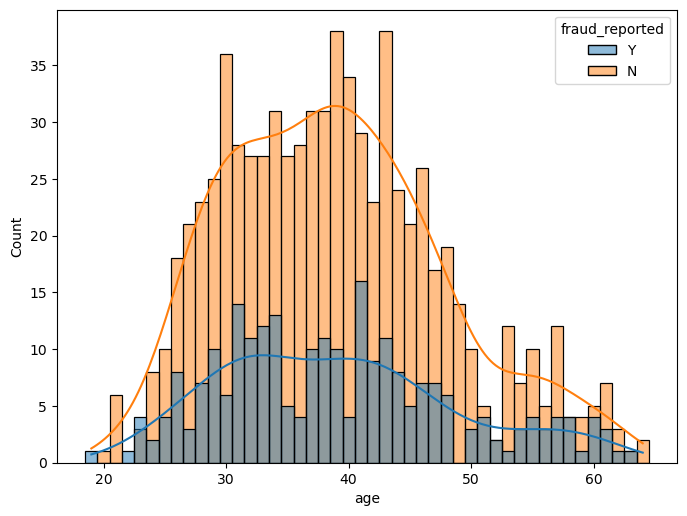

In [50]:
plt.figure(figsize=(8,6),dpi=100)
sns.histplot(data=df,x='age',hue='fraud_reported',kde=True,discrete=True)

#### * The customer's whose age is 40 or more,we can see that the counts of number of frauds is quite high.

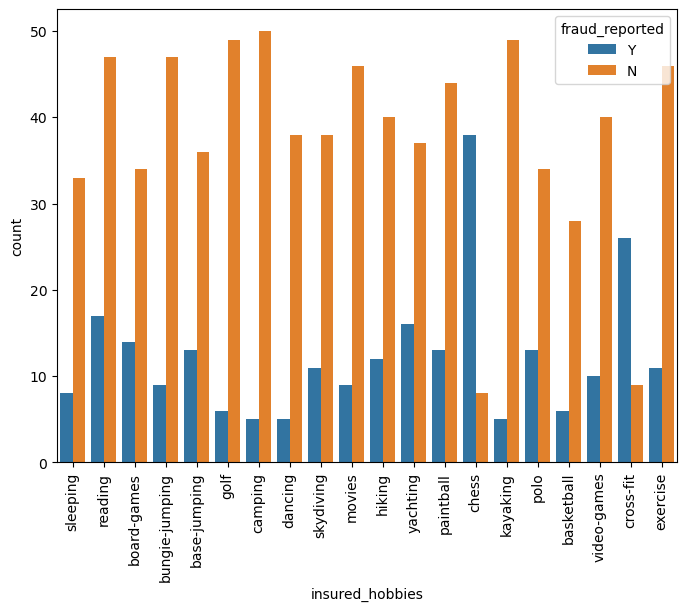

In [51]:
plt.figure(figsize=(8,6),dpi=100)
sns.countplot(data=df,x='insured_hobbies',hue='fraud_reported')
plt.xticks(rotation=90);

#### * Insured with hobbies -->chess has the highest chance of doing fraud

In [52]:
df['incident_date'].unique()

array(['25-01-2015', '21-01-2015', '22-02-2015', '10-01-2015',
       '17-02-2015', '02-01-2015', '13-01-2015', '27-02-2015',
       '30-01-2015', '05-01-2015', '06-01-2015', '15-02-2015',
       '22-01-2015', '08-01-2015', '15-01-2015', '29-01-2015',
       '19-01-2015', '01-01-2015', '10-02-2015', '11-01-2015',
       '24-02-2015', '09-01-2015', '28-01-2015', '07-01-2015',
       '18-01-2015', '28-02-2015', '12-02-2015', '24-01-2015',
       '03-01-2015', '16-01-2015', '14-02-2015', '21-02-2015',
       '18-02-2015', '26-02-2015', '17-01-2015', '27-01-2015',
       '11-02-2015', '12-01-2015', '06-02-2015', '20-01-2015',
       '02-02-2015', '20-02-2015', '08-02-2015', '23-02-2015',
       '01-03-2015', '14-01-2015', '19-02-2015', '09-02-2015',
       '26-01-2015', '23-01-2015', '31-01-2015', '03-02-2015',
       '01-02-2015', '05-02-2015', '25-02-2015', '16-02-2015',
       '13-02-2015', '04-02-2015', '07-02-2015', '04-01-2015'],
      dtype=object)

#### * All the report are of year 2015 and also from 1st and 2nd ,month and hence we can drop incident date

In [53]:
df['Policy_Day']=pd.to_datetime(df.policy_bind_date,format="%d-%m-%Y").dt.day
df['Policy_Month']=pd.to_datetime(df.policy_bind_date,format="%d-%m-%Y").dt.month
df['Policy_Year']=pd.to_datetime(df.policy_bind_date,format="%d-%m-%Y").dt.year

df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft   Rear Collision      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft   Rear Collision      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1              NO   
2                         7                            3              NO   
3                         5                            1              NO   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                      NO                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [54]:
# dropping policy_bind_date and incident_date as it is now seperated:

df.drop('incident_date',axis=1,inplace=True)
df.drop('policy_bind_date',axis=1,inplace=True)
df.head()

months_as_customer  age  policy_number policy_state policy_csl  \
0                 328   48         521585           OH    250/500   
1                 228   42         342868           IN    250/500   
2                 134   29         687698           OH    100/300   
3                 256   41         227811           IL    250/500   
4                 228   44         367455           IL   500/1000   

   policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0               1000                1406.91               0       466132   
1               2000                1197.22         5000000       468176   
2               2000                1413.14         5000000       430632   
3               2000                1415.74         6000000       608117   
4               1000                1583.91         6000000       610706   

  insured_sex insured_education_level insured_occupation insured_hobbies  \
0        MALE                      MD       craft-repair        sleeping   
1        MALE                      MD  machine-op-inspct         reading   
2      FEMALE                     PhD              sales     board-games   
3      FEMALE                     PhD       armed-forces     board-games   
4        MALE               Associate              sales     board-games   

  insured_relationship  capital-gains  capital-loss             incident_type  \
0              husband          53300             0  Single Vehicle Collision   
1       other-relative              0             0             Vehicle Theft   
2            own-child          35100             0   Multi-vehicle Collision   
3            unmarried          48900        -62400  Single Vehicle Collision   
4            unmarried          66000        -46000             Vehicle Theft   

    collision_type incident_severity authorities_contacted incident_state  \
0   Side Collision      Major Damage                Police             SC   
1   Rear Collision      Minor Damage                Police             VA   
2   Rear Collision      Minor Damage                Police             NY   
3  Front Collision      Major Damage                Police             OH   
4   Rear Collision      Minor Damage                  None             NY   

  incident_city  incident_location  incident_hour_of_the_day  \
0      Columbus     9935 4th Drive                         5   
1     Riverwood       6608 MLK Hwy                         8   
2      Columbus  7121 Francis Lane                         7   
3     Arlington   6956 Maple Drive                         5   
4     Arlington       3041 3rd Ave                        20   

   number_of_vehicles_involved property_damage  bodily_injuries  witnesses  \
0                            1             YES                1          2   
1                            1              NO                0          0   
2                            3              NO                2          3   
3                            1              NO                1          2   
4                            1              NO                0          1   

  police_report_available  total_claim_amount  injury_claim  property_claim  \
0                     YES               71610          6510           13020   
1                      NO                5070           780             780   
2                      NO               34650          7700            3850   
3                      NO               63400          6340            6340   
4                      NO                6500          1300             650   

   vehicle_claim  auto_make auto_model  auto_year fraud_reported  Policy_Day  \
0          52080       Saab        92x       2004              Y          17   
1           3510   Mercedes       E400       2007              Y          27   
2          23100      Dodge        RAM       2007              N           6   
3          50720  Chevrolet      Tahoe       2014              Y          2

In [55]:
df['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In [56]:
df[["limit", "total"]]=df["policy_csl"].str.split("/", expand=True)
df["policy_csl_decimal"] = df["limit"].astype(float) / df["total"].astype(float)

df.head()

months_as_customer  age  policy_number policy_state policy_csl  \
0                 328   48         521585           OH    250/500   
1                 228   42         342868           IN    250/500   
2                 134   29         687698           OH    100/300   
3                 256   41         227811           IL    250/500   
4                 228   44         367455           IL   500/1000   

   policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0               1000                1406.91               0       466132   
1               2000                1197.22         5000000       468176   
2               2000                1413.14         5000000       430632   
3               2000                1415.74         6000000       608117   
4               1000                1583.91         6000000       610706   

  insured_sex insured_education_level insured_occupation insured_hobbies  \
0        MALE                      MD       craft-repair        sleeping   
1        MALE                      MD  machine-op-inspct         reading   
2      FEMALE                     PhD              sales     board-games   
3      FEMALE                     PhD       armed-forces     board-games   
4        MALE               Associate              sales     board-games   

  insured_relationship  capital-gains  capital-loss             incident_type  \
0              husband          53300             0  Single Vehicle Collision   
1       other-relative              0             0             Vehicle Theft   
2            own-child          35100             0   Multi-vehicle Collision   
3            unmarried          48900        -62400  Single Vehicle Collision   
4            unmarried          66000        -46000             Vehicle Theft   

    collision_type incident_severity authorities_contacted incident_state  \
0   Side Collision      Major Damage                Police             SC   
1   Rear Collision      Minor Damage                Police             VA   
2   Rear Collision      Minor Damage                Police             NY   
3  Front Collision      Major Damage                Police             OH   
4   Rear Collision      Minor Damage                  None             NY   

  incident_city  incident_location  incident_hour_of_the_day  \
0      Columbus     9935 4th Drive                         5   
1     Riverwood       6608 MLK Hwy                         8   
2      Columbus  7121 Francis Lane                         7   
3     Arlington   6956 Maple Drive                         5   
4     Arlington       3041 3rd Ave                        20   

   number_of_vehicles_involved property_damage  bodily_injuries  witnesses  \
0                            1             YES                1          2   
1                            1              NO                0          0   
2                            3              NO                2          3   
3                            1              NO                1          2   
4                            1              NO                0          1   

  police_report_available  total_claim_amount  injury_claim  property_claim  \
0                     YES               71610          6510           13020   
1                      NO                5070           780             780   
2                      NO               34650          7700            3850   
3                      NO               63400          6340            6340   
4                      NO                6500          1300             650   

   vehicle_claim  auto_make auto_model  auto_year fraud_reported  Policy_Day  \
0          52080       Saab        92x       2004              Y          17   
1           3510   Mercedes       E400       2007              Y          27   
2          23100      Dodge        RAM       2007              N           6   
3          50720  Chevrolet      Tahoe       2014              Y          2

In [57]:
df.drop('policy_csl',axis=1,inplace=True)
df.drop('limit',axis=1,inplace=True)
df.drop('total',axis=1,inplace=True)

df.head()

months_as_customer  age  policy_number policy_state  policy_deductable  \
0                 328   48         521585           OH               1000   
1                 228   42         342868           IN               2000   
2                 134   29         687698           OH               2000   
3                 256   41         227811           IL               2000   
4                 228   44         367455           IL               1000   

   policy_annual_premium  umbrella_limit  insured_zip insured_sex  \
0                1406.91               0       466132        MALE   
1                1197.22         5000000       468176        MALE   
2                1413.14         5000000       430632      FEMALE   
3                1415.74         6000000       608117      FEMALE   
4                1583.91         6000000       610706        MALE   

  insured_education_level insured_occupation insured_hobbies  \
0                      MD       craft-repair        sleeping   
1                      MD  machine-op-inspct         reading   
2                     PhD              sales     board-games   
3                     PhD       armed-forces     board-games   
4               Associate              sales     board-games   

  insured_relationship  capital-gains  capital-loss             incident_type  \
0              husband          53300             0  Single Vehicle Collision   
1       other-relative              0             0             Vehicle Theft   
2            own-child          35100             0   Multi-vehicle Collision   
3            unmarried          48900        -62400  Single Vehicle Collision   
4            unmarried          66000        -46000             Vehicle Theft   

    collision_type incident_severity authorities_contacted incident_state  \
0   Side Collision      Major Damage                Police             SC   
1   Rear Collision      Minor Damage                Police             VA   
2   Rear Collision      Minor Damage                Police             NY   
3  Front Collision      Major Damage                Police             OH   
4   Rear Collision      Minor Damage                  None             NY   

  incident_city  incident_location  incident_hour_of_the_day  \
0      Columbus     9935 4th Drive                         5   
1     Riverwood       6608 MLK Hwy                         8   
2      Columbus  7121 Francis Lane                         7   
3     Arlington   6956 Maple Drive                         5   
4     Arlington       3041 3rd Ave                        20   

   number_of_vehicles_involved property_damage  bodily_injuries  witnesses  \
0                            1             YES                1          2   
1                            1              NO                0          0   
2                            3              NO                2          3   
3                            1              NO                1          2   
4                            1              NO                0          1   

  police_report_available  total_claim_amount  injury_claim  property_claim  \
0                     YES               71610          6510           13020   
1                      NO                5070           780             780   
2                      NO               34650          7700            3850   
3                      NO               63400          6340            6340   
4                      NO                6500          1300             650   

   vehicle_claim  auto_make auto_model  auto_year fraud_reported  Policy_Day  \
0          52080       Saab        92x       2004              Y          17   
1           3510   Mercedes       E400       2007              Y          27   
2          23100      Dodge        RAM       2007              N           6   
3          50720  Chevrolet      Tahoe       2014              Y          25   
4           4550     Accura        RSX       2009            

In [58]:
# dropping the policy number column as it is unique for every customer :

df.drop('policy_number',axis=1,inplace=True)

In [59]:
# label encoding target for relating columns
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['fraud_reported'] = LE.fit_transform(df['fraud_reported'])

### Checking Correlation

In [60]:
df.corr()

months_as_customer       age  policy_deductable  \
months_as_customer                     1.000000  0.922098           0.026807   
age                                    0.922098  1.000000           0.029188   
policy_deductable                      0.026807  0.029188           1.000000   
policy_annual_premium                  0.005018  0.014404          -0.003245   
umbrella_limit                         0.015498  0.018126           0.010870   
insured_zip                            0.017895  0.025604           0.004545   
capital-gains                          0.006399 -0.007075           0.035212   
capital-loss                           0.020209  0.007368          -0.023544   
incident_hour_of_the_day               0.070639  0.087161           0.060935   
number_of_vehicles_involved            0.014736  0.022102           0.051214   
bodily_injuries                       -0.010162 -0.015679          -0.022765   
witnesses                              0.058383  0.052359           0.066639   
total_claim_amount                     0.062108  0.069863           0.022839   
injury_claim                           0.065329  0.075522           0.039107   
property_claim                         0.034940  0.060898           0.064792   
vehicle_claim                          0.061013  0.062588           0.005269   
auto_year                             -0.000292  0.001354           0.026105   
fraud_reported                         0.020544  0.012143           0.014817   
Policy_Day                             0.054809  0.056776          -0.000265   
Policy_Month                          -0.001559  0.008357          -0.025020   
Policy_Year                           -0.048276 -0.037444          -0.049598   
policy_csl_decimal                    -0.025164 -0.011516           0.001592   

                             policy_annual_premium  umbrella_limit  \
months_as_customer                        0.005018        0.015498   
age                                       0.014404        0.018126   
policy_deductable                        -0.003245        0.010870   
policy_annual_premium                     1.000000       -0.006247   
umbrella_limit                           -0.006247        1.000000   
insured_zip                               0.032354        0.019671   
capital-gains                            -0.013738       -0.047268   
capital-loss                              0.023547       -0.024056   
incident_hour_of_the_day                 -0.001578       -0.023257   
number_of_vehicles_involved              -0.045991       -0.021270   
bodily_injuries                           0.026780        0.022743   
witnesses                                 0.002332       -0.006738   
total_claim_amount                        0.009094       -0.040344   
injury_claim                             -0.017633       -0.045412   
property_claim                           -0.011654       -0.023790   
vehicle_claim                             0.020246       -0.038584   
auto_year                                -0.049226        0.009893   
fraud_reported                           -0.014480        0.058622   
Policy_Day                               -0.037933       -0.023361   
Policy_Month                             -0.002480       -0.045871   
Policy_Year                               0.001249        0.048008   
policy_csl_decimal                        0.029115        0.033119   

                             insured_zip  capital-gains  capital-loss  \
months_as_customer              0.017895       0.006399      0.020209   
age                             0.025604      -0.007075      0.007368   
policy_deductable               0.004545       0.035212     -0.023544   
policy_annual_premium           0.032354      -0.013738      0.023547   
umbrella_limit                  0.019671      -0.047268     -0.024056   
insured_zip                     1.000000       0.006303      0.049372   
capital-gains                   0.006303       1.000000     -0.046

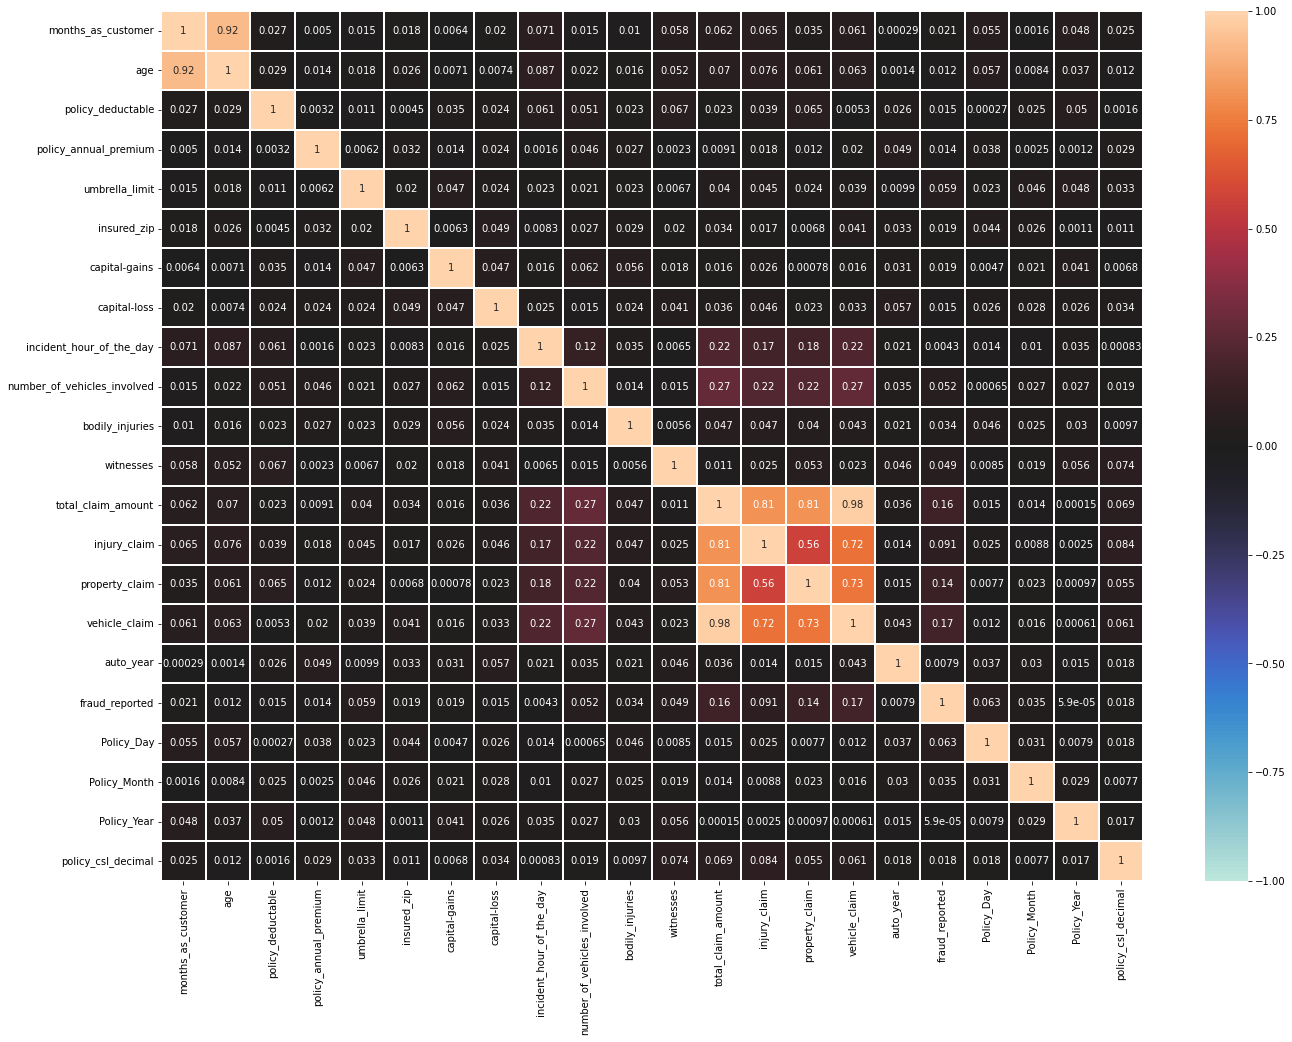

In [61]:
# Visualising Heatmap for correlation

df_corr=df.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,center=0,fmt=".2g",linewidths=.2)
plt.show()

#### * VEHICLE CLAIM,PROPERTY CLAIM,INJURY CLAIM,TOTAL AMOUNT CLAIM ARE HIGHLY CORRELATED WITH EACH OTHER

#### * ALL OTHER COLUMNS ARE HAVING NORMAL CORRELATION ALSO WITH TARGET FRAUD REPORTED.

#### * AGE AND MONTH AS CUSTOMER ARE ALSO HIGHLY CORRELATED

<AxesSubplot:title={'center':'Correlation with fraud_reported'}>

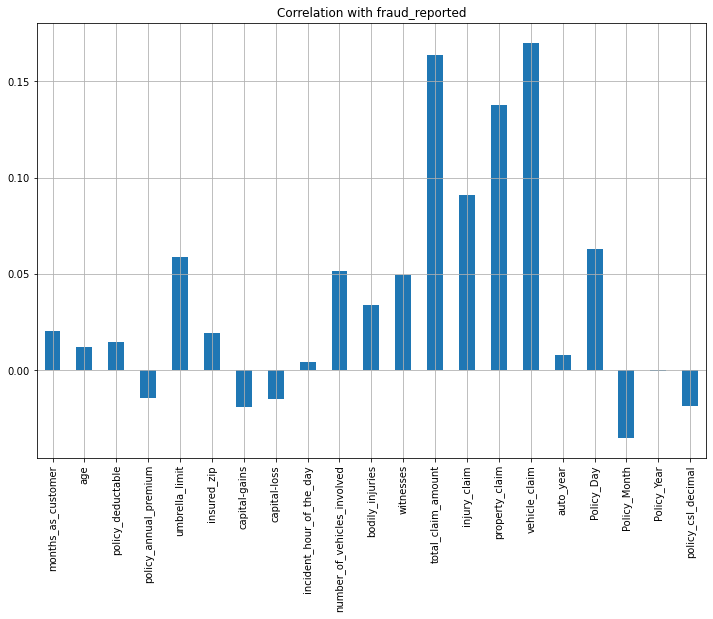

In [62]:
df.drop(columns = ['fraud_reported'], axis = 1).corrwith(df.fraud_reported).plot(kind = 'bar', grid = True, figsize = (12,8),
                                                     title = "Correlation with fraud_reported")

#### * ALL THE COLUMNS ARE WEAKLY CORRELATED WITH THE TARGET VARIABLE WHILE SOME ARE EXTREMLY WEAKLY CORRELATED

### Encoding the categrorical variables using Label Encoder :

In [63]:
# Encoding using Label Encoder :

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
obj=['policy_state','insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
        'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_location', 'property_damage','police_report_available','auto_make',
       'auto_model']

for o in obj:
    df[o] = LE.fit_transform(df[o])

df.dtypes

months_as_customer               int64
age                              int64
policy_state                     int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_location                int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                

### Outliers :

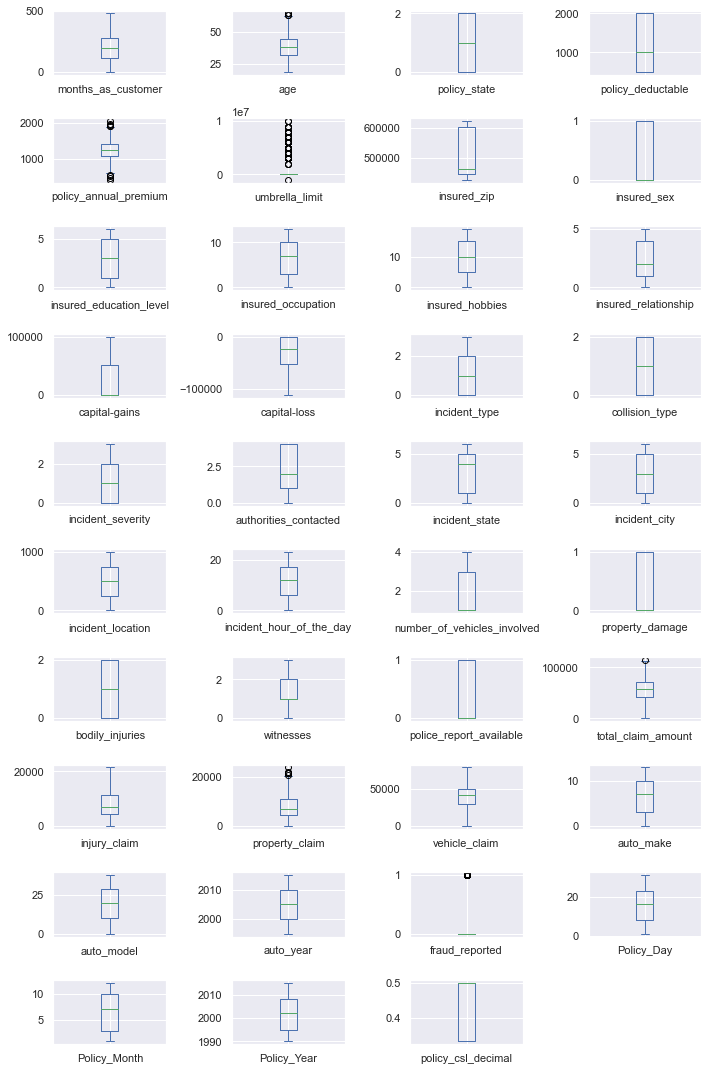

In [64]:
sns.set(style="darkgrid")
df.plot(kind='box',subplots=True,layout=(10,4),figsize=(10,15))
plt.tight_layout()

#### * age,property_claim,umbrella limit and policy annual premium are having some outliers hence we will deal with them

In [65]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

months_as_customer       age  policy_state  policy_deductable  \
0              1.078140  0.990836      1.187173           0.222383   
1              0.208995  0.334073      0.016856           1.412784   
2              0.608002  1.088913      1.187173           1.412784   
3              0.452355  0.224613      1.220886           1.412784   
4              0.208995  0.552994      1.220886           0.222383   
5              0.452355  0.005692      1.187173           0.222383   
6              0.581927  0.541611      0.016856           0.222383   
7              0.338567  0.213229      1.220886           0.222383   
8              1.537987  0.651071      1.220886           1.039966   
9              0.069931  0.334073      1.220886           1.039966   
10             0.269835  0.334073      1.187173           1.039966   
11             2.112422  2.413823      1.187173           1.412784   
12             1.251169  1.745676      1.187173           1.039966   
13             0.720991  0.541611      1.187173           0.222383   
14             0.208195  0.103769      1.187173           1.412784   
15             2.338400  2.085441      0.016856           1.412784   
16             1.164254  1.417295      1.187173           0.222383   
17             0.555853  0.869992      0.016856           1.039966   
18             0.382024  0.213229      1.187173           1.039966   
19             0.069132  0.005692      0.016856           1.412784   
20             2.225411  2.523284      0.016856           0.222383   
21             0.113389  0.224613      1.220886           1.412784   
22             1.443180  1.757060      1.220886           1.412784   
23             1.816913  1.757060      0.016856           1.412784   
24             0.287218  0.115152      0.016856           0.222383   
25             1.703124  0.432150      1.187173           1.412784   
26             0.461047  0.443534      0.016856           1.412784   
27             0.016983  0.541611      0.016856           1.039966   
28             0.174229  0.115152      1.187173           1.412784   
29             0.321983  0.662455      1.220886           1.412784   
30             1.216403  1.526755      1.220886           0.222383   
31             0.329875  0.213229      1.220886           1.412784   
32             0.425481  0.432150      1.220886           0.222383   
33             0.781831  0.979453      1.220886           0.222383   
34             0.477630  0.213229      1.220886           1.039966   
35             0.495013  0.651071      1.187173           0.222383   
36             1.233786  1.198374      1.220886           0.222383   
37             0.739173  1.100297      1.220886           1.412784   
38             1.973359  1.647599      0.016856           1.412784   
39             0.043057  0.213229      0.016856           1.039966   
40             1.086031  1.417295      1.220886           1.039966   
41             0.764448  0.541611      0.016856           1.039966   
42             1.451072  1.745676      1.220886           1.039966   
43             0.851362  0.979453      1.187173           1.039966   
44             0.565344  0.552994      1.220886           1.412784   
45             0.530578  0.115152      1.220886           0.222383   
46             0.355950  0.651071      0.016856           1.039966   
47             1.312809  0.881376      1.187173           1.412784   
48             0.251652  0.541611      0.016856           0.222383   
49             0.103898  0.432150      1.220886           0.222383   
50             1.964667  2.194902      1.187173           1.412784   
51             0.981734  1.307834      1.220886           1.412784   
52             0.113389  0.005692      0.016856           0.222383   
53             0.165537  0.115152      0.016856           1.039966   
54             0.077823  0.005692      1.187173           0.222383   
55             1.581444  1.417295      1.187173           0.222383   
56             

In [66]:
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 5,  5,  5,  5,  5,  4,  4,  5,  5,  5,  5, 29,  5,  5,  5,  4, 13,
        5,  5,  5], dtype=int64))


In [67]:
df1=df[(z<3).all(axis=1)]

x=df1

x

months_as_customer  age  policy_state  policy_deductable  \
0                   328   48             2               1000   
1                   228   42             1               2000   
2                   134   29             2               2000   
3                   256   41             0               2000   
4                   228   44             0               1000   
5                   256   39             2               1000   
6                   137   34             1               1000   
7                   165   37             0               1000   
8                    27   33             0                500   
9                   212   42             0                500   
10                  235   42             2                500   
11                  447   61             2               2000   
12                   60   23             2                500   
13                  121   34             2               1000   
14                  180   38             2               2000   
15                  473   58             1               2000   
16                   70   26             2               1000   
17                  140   31             1                500   
18                  160   37             2                500   
19                  196   39             1               2000   
20                  460   62             1               1000   
21                  217   41             0               2000   
22                  370   55             0               2000   
23                  413   55             1               2000   
24                  237   40             1               1000   
25                    8   35             2               2000   
26                  257   43             1               2000   
27                  202   34             1                500   
28                  224   40             2               2000   
29                  241   45             0               2000   
30                   64   25             0               1000   
32                  155   35             0               1000   
33                  114   30             0               1000   
34                  149   37             0                500   
35                  147   33             2               1000   
36                   62   28             0               1000   
37                  289   49             0               2000   
38                  431   54             1               2000   
39                  199   37             1                500   
40                   79   26             0                500   
41                  116   34             1                500   
42                   37   23             0                500   
43                  106   30             2                500   
44                  269   44             0               2000   
45                  265   40             0               1000   
46                  163   33             1                500   
47                  355   47             2               2000   
49                  192   35             0               1000   
50                  430   59             2               2000   
51                   91   27             0               2000   
52                  217   39             1               1000   
53                  223   40             1                500   
54                  195   39             2               1000   
55                   22   26             2               1000   
56                  439   56             1                500   
57                   94   32             1               1000   
58                   11   39             0               2000   
59                  151   36             2               2000   
60                  154   34             1                500   
61                  245   44             0               1000   
62                  119   32            

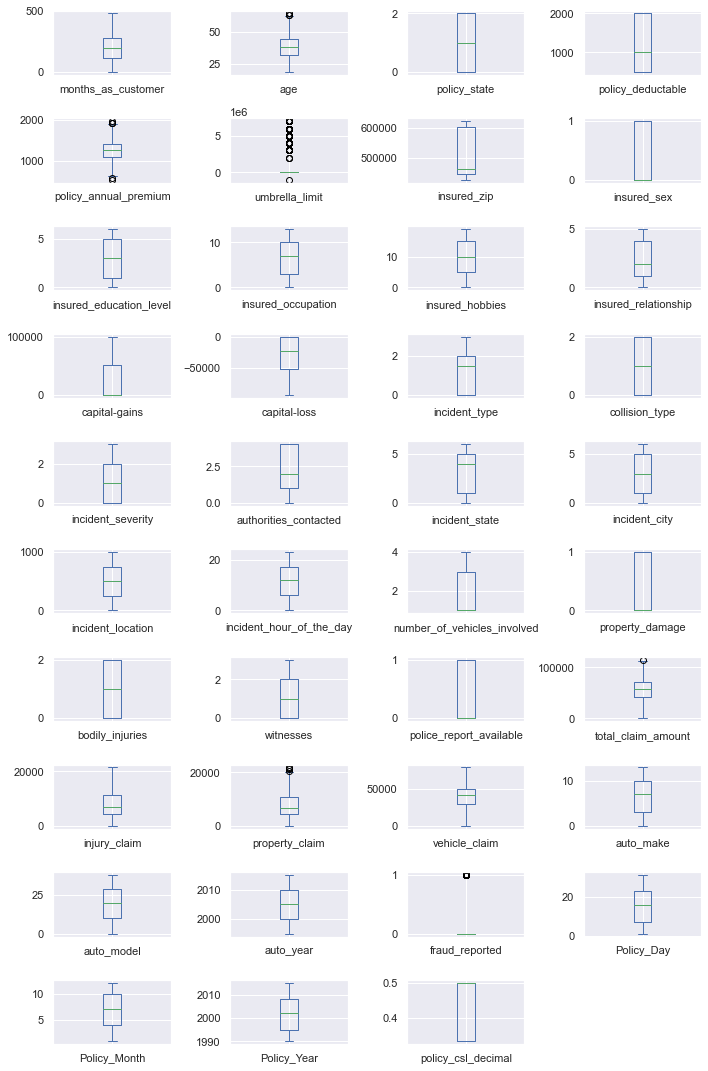

In [68]:
sns.set(style="darkgrid")

df1.plot(kind='box',subplots=True,layout=(10,4),figsize=(10,15))

plt.tight_layout()

In [69]:
print(" Data loss is : ",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

 Data loss is :  2.0


#### Hence the data loss is only 2% hence we will remove the outliers :

### Seperating the dataset into features and target

In [70]:
#independent column
x=df1.drop(['fraud_reported'],axis=1)

#target
y=df1['fraud_reported']

In [71]:
x.shape, y.shape

((980, 38), (980,))

### Skewness

In [72]:
df1.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.837283
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.032778
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_location             -0.003369
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
property_damage                0.853093
bodily_injuries                0.003757


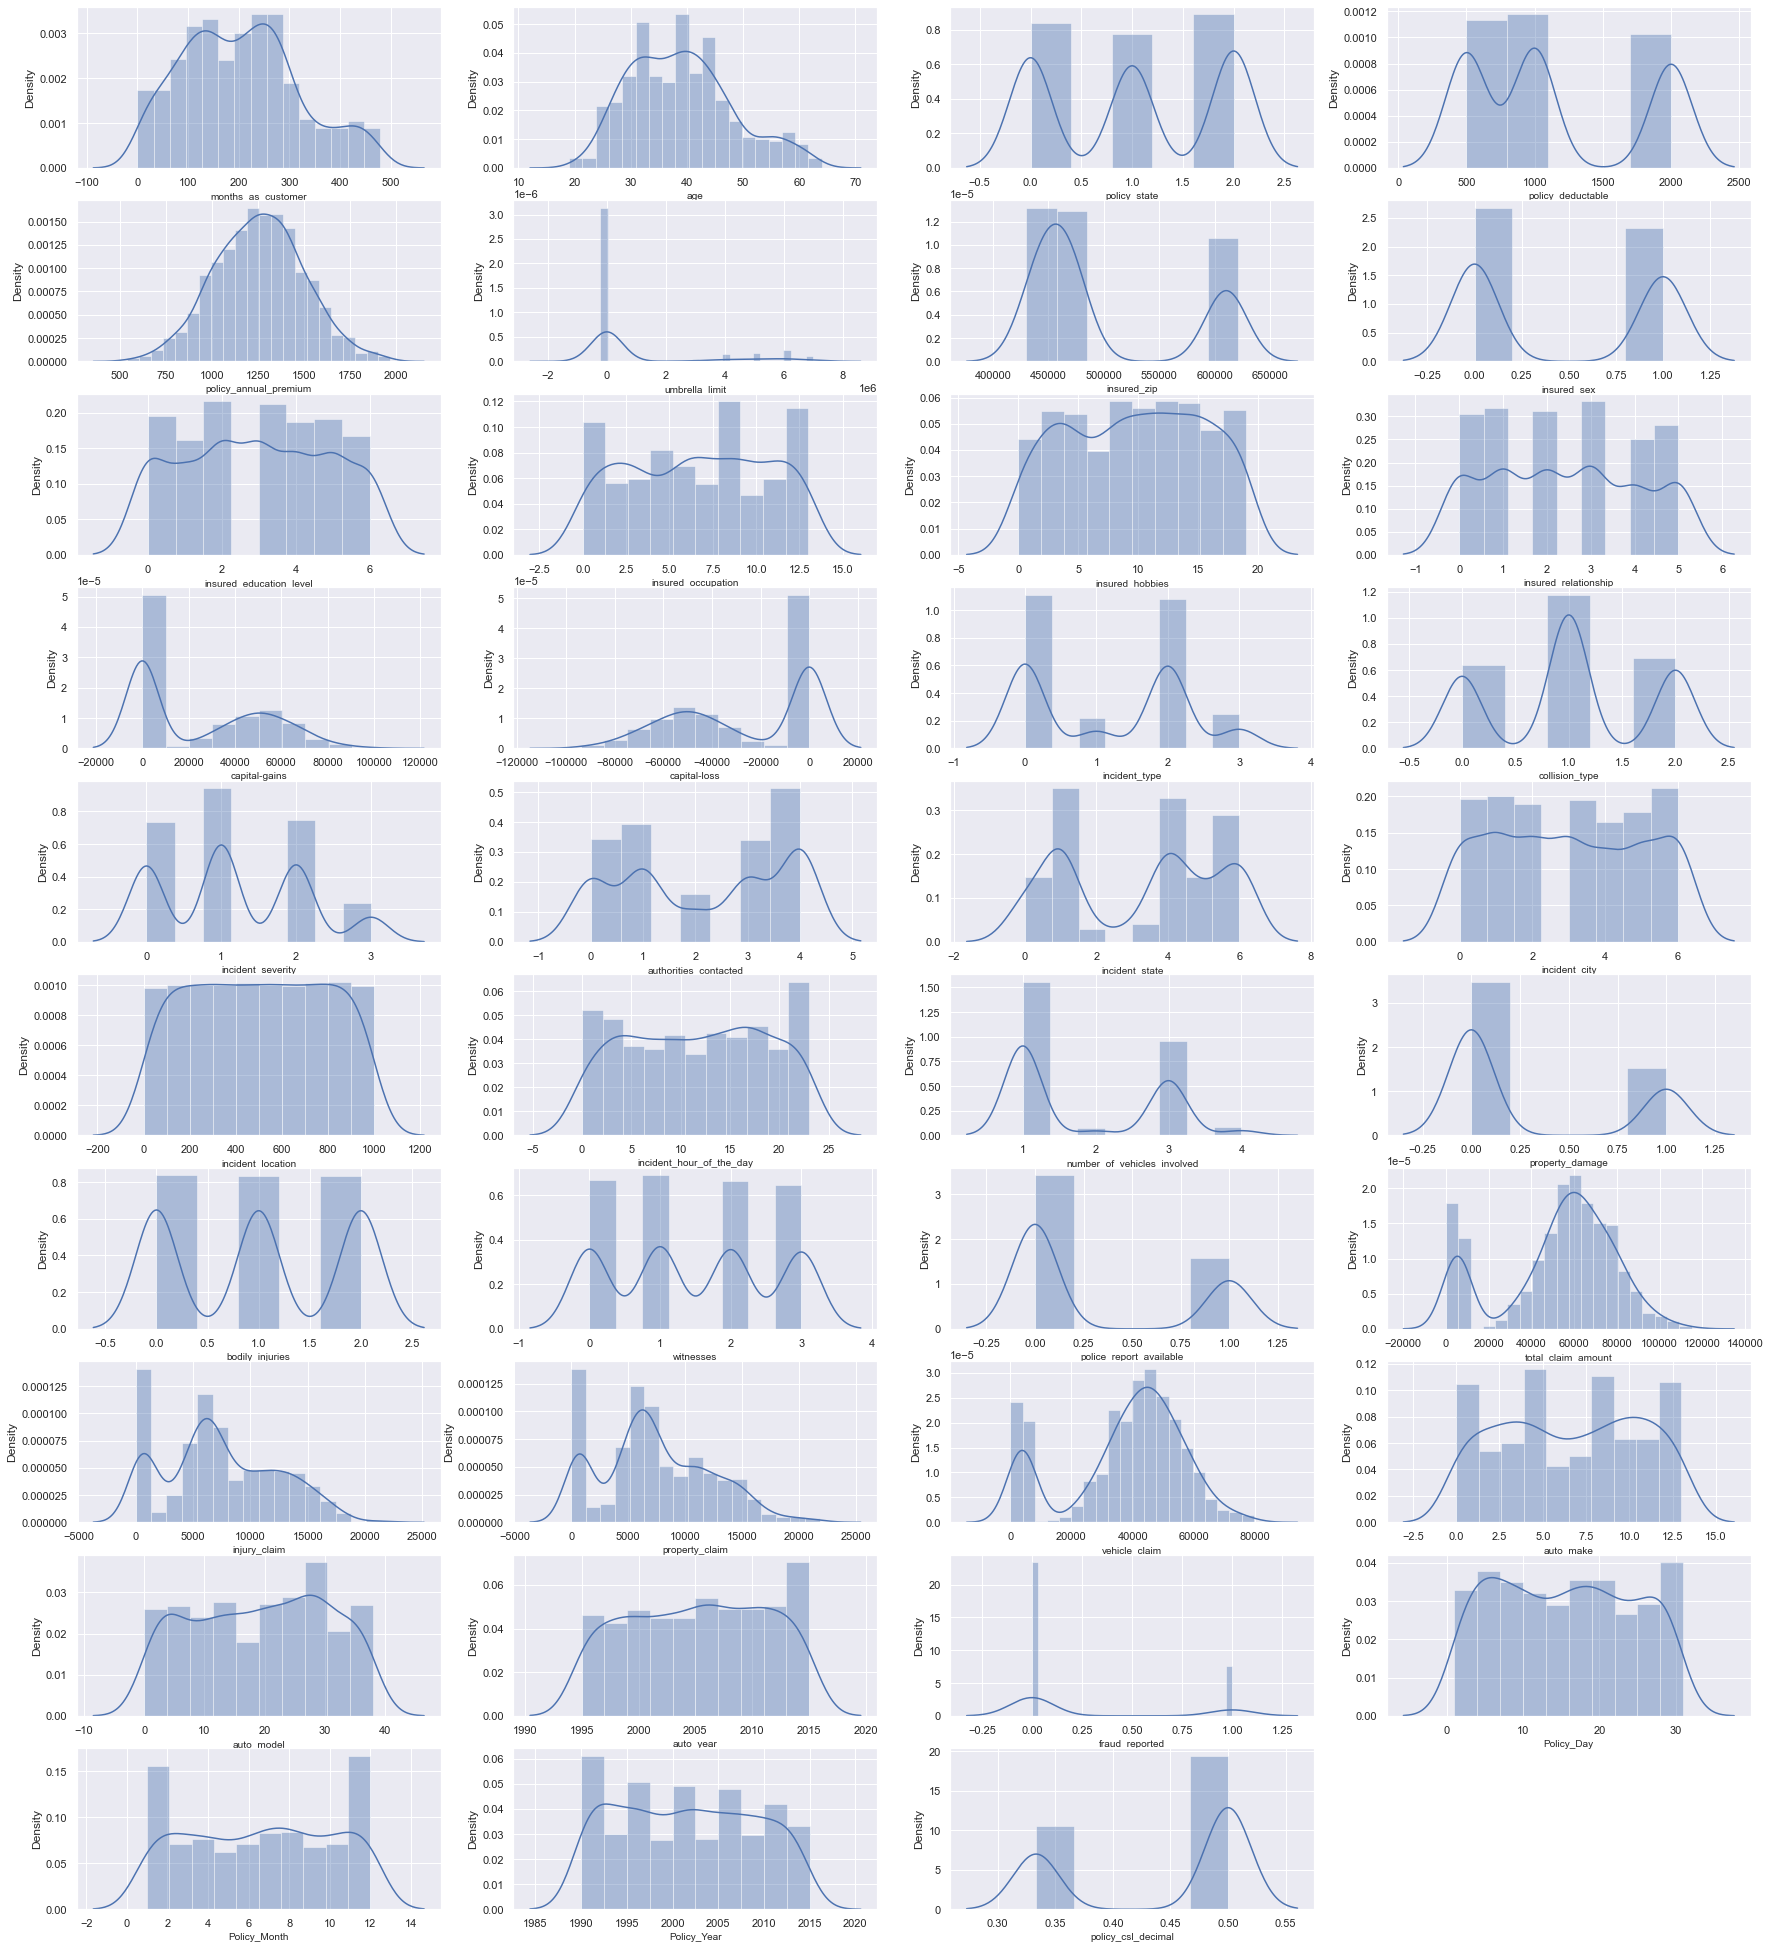

In [73]:
# visualizing the skewness:

plt.figure(figsize=(30,35),facecolor='white')
plotnumber=1
for column in df1.columns:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

#### * CAPITAL GAIN ,CAPITAL LOSS,PROPERTY CLAIM,INJURY CLAIM,UMBRELLA LIMIT ARE HAVING SKEWNESS

### Skewness Removal

In [74]:
from sklearn.preprocessing import power_transform

df1['capital-gains']=power_transform(x,method='yeo-johnson')
df1['capital-loss']=power_transform(x,method='yeo-johnson')
df1['property_claim']=power_transform(x,method='yeo-johnson')
df1['injury_claim']=power_transform(x,method='yeo-johnson')
df1['umbrella_limit']=power_transform(x,method='yeo-johnson')

df1.head()

months_as_customer  age  policy_state  policy_deductable  \
0                 328   48             2               1000   
1                 228   42             1               2000   
2                 134   29             2               2000   
3                 256   41             0               2000   
4                 228   44             0               1000   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                1406.91        1.044541       466132            1   
1                1197.22        0.299045       468176            1   
2                1413.14       -0.515819       430632            0   
3                1415.74        0.517526       608117            0   
4                1583.91        0.299045       610706            1   

   insured_education_level  insured_occupation  insured_hobbies  \
0                        4                   2               17   
1                        4                   6               15   
2                        6                  11                2   
3                        6                   1                2   
4                        0                  11                2   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0                     0       1.044541      1.044541              2   
1                     2       0.299045      0.299045              3   
2                     3      -0.515819     -0.515819              0   
3                     4       0.517526      0.517526              2   
4                     4       0.299045      0.299045              3   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0               2                  0                      4               4   
1               1                  1                      4               5   
2               1                  1                      4               1   
3               0                  0                      4               2   
4               1                  1                      2               1   

   incident_city  incident_location  incident_hour_of_the_day  \
0              1                996                         5   
1              5                628                         8   
2              1                685                         7   
3              0                669                         5   
4              0                220                        20   

   number_of_vehicles_involved  property_damage  bodily_injuries  witnesses  \
0                            1                1                1          2   
1                            1                0                0          0   
2                            3                0                2          3   
3                            1                0                1          2   
4                            1                0                0          1   

   police_report_available  total_claim_amount  injury_claim  property_claim  \
0                        1               71610      1.044541        1.044541   
1                        0                5070      0.299045        0.299045   
2                        0               34650     -0.515819       -0.515819   
3                        0               63400      0.517526        0.517526   
4                        0                6500      0.299045        0.299045   

   vehicle_claim  auto_make  auto_model  auto_year  fraud_reported  \
0          52080         10           1       2004               1   
1           3510          8          12       2007               1   
2          23100          4          30       2007               0   
3          50720          3          34       2014               1   
4           4550          0          31       2009               0   

   Policy_Day  Policy_Month  Policy_Year  policy_csl_decimal  
0          17            10         2014            0.500000  
1   

In [75]:
df1.shape

(980, 39)

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

x.head()

months_as_customer       age  policy_state  policy_deductable  \
0            1.069568  0.983352      1.179821          -0.224643   
1            0.202726  0.329711     -0.024580           1.412161   
2           -0.612105 -1.086511      1.179821           1.412161   
3            0.445442  0.220771     -1.228980           1.412161   
4            0.202726  0.547591     -1.228980          -0.224643   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0               0.620031       -0.467878    -0.484014     1.071971   
1              -0.248448        1.890767    -0.455363     1.071971   
2               0.645834        1.890767    -0.981629    -0.932861   
3               0.656603        2.362496     1.506233    -0.932861   
4               1.353117        2.362496     1.542524     1.071971   

   insured_education_level  insured_occupation  insured_hobbies  \
0                 0.532901           -1.156087         1.275279   
1                 0.532901           -0.160292         0.923775   
2                 1.556905            1.084451        -1.361003   
3                 1.556905           -1.405036        -1.361003   
4                -1.515109            1.084451        -1.361003   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0             -1.437247       1.003849      0.955432       0.761515   
1             -0.248136      -0.906228      0.955432       1.687428   
2              0.346420       0.351628      0.955432      -1.090309   
3              0.940975       0.846169     -1.278119       0.761515   
4              0.940975       1.458971     -0.691096       1.687428   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0        1.345272          -1.259947               1.198446        0.351070   
1       -0.029459          -0.195509               1.198446        0.814748   
2       -0.029459          -0.195509               1.198446       -1.039963   
3       -1.404189          -1.259947               1.198446       -0.576285   
4       -0.029459          -0.195509              -0.106529       -1.039963   

   incident_city  incident_location  incident_hour_of_the_day  \
0      -0.973760           1.718030                 -0.960633   
1       0.990800           0.441603                 -0.529777   
2      -0.973760           0.639311                 -0.673396   
3      -1.464901           0.583814                 -0.960633   
4      -1.464901          -0.973566                  1.193647   

   number_of_vehicles_involved  property_damage  bodily_injuries  witnesses  \
0                    -0.820087         1.512809         0.002498   0.466378   
1                    -0.820087        -0.661022        -1.221626  -1.333033   
2                     1.144914        -0.661022         1.226623   1.366083   
3                    -0.820087        -0.661022         0.002498   0.466378   
4                    -0.820087        -0.661022        -1.221626  -0.433327   

   police_report_available  total_claim_amount  injury_claim  property_claim  \
0                 1.473608            0.718507     -0.187627        1.176015   
1                -0.678606           -1.808821     -1.361005       -1.378984   
2                -0.678606           -0.685311      0.056059       -0.738147   
3                -0.678606            0.406674     -0.222439       -0.218380   
4                -0.678606           -1.754507     -1.254521       -1.406121   

   vehicle_claim  auto_make  auto_model  auto_year  Policy_Day  Policy_Month  \
0       0.753824   0.851959   -1.640447  -0.188594    0.179217      0.972112   
1      -1.824679   0.355279   -0.651740   0.310476    1.313063     -0.169152   
2      -0.784678  -0.638083    0.966145   0.310476   -1.068013      0.686796   
3       0.681623  -0.886423    1.325675   1.474975    1.086294     -0.454467   
4      -1.769467  -1.631444    1.056027   0.643190   -1.068013     -0.169152   

   Policy_Year  policy_csl_decimal  
0  

### Checking VIF to check the Multicollinearity

In [77]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values                     Features
0     6.910560           months_as_customer
1     6.925107                          age
2     1.032165                 policy_state
3     1.044753            policy_deductable
4     1.038419        policy_annual_premium
5     1.044869               umbrella_limit
6     1.034419                  insured_zip
7     1.031309                  insured_sex
8     1.052039      insured_education_level
9     1.022458           insured_occupation
10    1.049095              insured_hobbies
11    1.050226         insured_relationship
12    1.037857                capital-gains
13    1.043026                 capital-loss
14    5.181762                incident_type
15    1.042513               collision_type
16    1.200205            incident_severity
17    1.089355        authorities_contacted
18    1.056229               incident_state
19    1.029508                incident_city
20    1.040081            incident_location
21    1.095864     incident_hour_of_the_day
22    5.160585  number_of_vehicles_involved
23    1.041007              property_damage
24    1.024888              bodily_injuries
25    1.051229                    witnesses
26    1.039066      police_report_available
27         inf           total_claim_amount
28         inf                 injury_claim
29         inf               property_claim
30         inf                vehicle_claim
31    1.077628                    auto_make
32    1.071901                   auto_model
33    1.044122                    auto_year
34    1.027189                   Policy_Day
35    1.029873                 Policy_Month
36    1.029789                  Policy_Year
37    1.042040           policy_csl_decimal

#### * The TOTAL CLAIM,PROPERTY CLAIM,VEHICLE CLAIM,INJURY CLAIM ARE SHOWING INF ,SO DROPPING TOTAL CLAIM AND LETS SEE AGAIN THE RESULTS OF VIF.

In [78]:
x.drop('total_claim_amount',axis=1,inplace=True)

In [79]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values                     Features
0     6.910560           months_as_customer
1     6.925107                          age
2     1.032165                 policy_state
3     1.044753            policy_deductable
4     1.038419        policy_annual_premium
5     1.044869               umbrella_limit
6     1.034419                  insured_zip
7     1.031309                  insured_sex
8     1.052039      insured_education_level
9     1.022458           insured_occupation
10    1.049095              insured_hobbies
11    1.050226         insured_relationship
12    1.037857                capital-gains
13    1.043026                 capital-loss
14    5.181762                incident_type
15    1.042513               collision_type
16    1.200205            incident_severity
17    1.089355        authorities_contacted
18    1.056229               incident_state
19    1.029508                incident_city
20    1.040081            incident_location
21    1.095864     incident_hour_of_the_day
22    5.160585  number_of_vehicles_involved
23    1.041007              property_damage
24    1.024888              bodily_injuries
25    1.051229                    witnesses
26    1.039066      police_report_available
27    2.186873                 injury_claim
28    2.257317               property_claim
29    3.396271                vehicle_claim
30    1.077628                    auto_make
31    1.071901                   auto_model
32    1.044122                    auto_year
33    1.027189                   Policy_Day
34    1.029873                 Policy_Month
35    1.029789                  Policy_Year
36    1.042040           policy_csl_decimal

#### * Now, we can see that their is no multicolinearity  as VIF is not above 10 for any column, so we can move forward for model building.

In [81]:
y.value_counts()

0    740
1    240
Name: fraud_reported, dtype: int64

### Dealing with data imbalance using SMOTE

In [82]:
#Data Balancing
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto')
X_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

1    740
0    740
Name: fraud_reported, dtype: int64

In [83]:
# Now we are going to check the shape of x and y:

print(X_sm.shape,y_sm.shape)

(1480, 37) (1480,)


In [84]:
x.dtypes

months_as_customer             float64
age                            float64
policy_state                   float64
policy_deductable              float64
policy_annual_premium          float64
umbrella_limit                 float64
insured_zip                    float64
insured_sex                    float64
insured_education_level        float64
insured_occupation             float64
insured_hobbies                float64
insured_relationship           float64
capital-gains                  float64
capital-loss                   float64
incident_type                  float64
collision_type                 float64
incident_severity              float64
authorities_contacted          float64
incident_state                 float64
incident_city                  float64
incident_location              float64
incident_hour_of_the_day       float64
number_of_vehicles_involved    float64
property_damage                float64
bodily_injuries                float64
witnesses                

In [85]:
y = y_sm

In [87]:
x = X_sm

In [88]:
x.shape, y.shape

((1480, 37), (1480,))

In [89]:
x.head()

months_as_customer       age  policy_state  policy_deductable  \
0            1.069568  0.983352      1.179821          -0.224643   
1            0.202726  0.329711     -0.024580           1.412161   
2           -0.612105 -1.086511      1.179821           1.412161   
3            0.445442  0.220771     -1.228980           1.412161   
4            0.202726  0.547591     -1.228980          -0.224643   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0               0.620031       -0.467878    -0.484014     1.071971   
1              -0.248448        1.890767    -0.455363     1.071971   
2               0.645834        1.890767    -0.981629    -0.932861   
3               0.656603        2.362496     1.506233    -0.932861   
4               1.353117        2.362496     1.542524     1.071971   

   insured_education_level  insured_occupation  insured_hobbies  \
0                 0.532901           -1.156087         1.275279   
1                 0.532901           -0.160292         0.923775   
2                 1.556905            1.084451        -1.361003   
3                 1.556905           -1.405036        -1.361003   
4                -1.515109            1.084451        -1.361003   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0             -1.437247       1.003849      0.955432       0.761515   
1             -0.248136      -0.906228      0.955432       1.687428   
2              0.346420       0.351628      0.955432      -1.090309   
3              0.940975       0.846169     -1.278119       0.761515   
4              0.940975       1.458971     -0.691096       1.687428   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0        1.345272          -1.259947               1.198446        0.351070   
1       -0.029459          -0.195509               1.198446        0.814748   
2       -0.029459          -0.195509               1.198446       -1.039963   
3       -1.404189          -1.259947               1.198446       -0.576285   
4       -0.029459          -0.195509              -0.106529       -1.039963   

   incident_city  incident_location  incident_hour_of_the_day  \
0      -0.973760           1.718030                 -0.960633   
1       0.990800           0.441603                 -0.529777   
2      -0.973760           0.639311                 -0.673396   
3      -1.464901           0.583814                 -0.960633   
4      -1.464901          -0.973566                  1.193647   

   number_of_vehicles_involved  property_damage  bodily_injuries  witnesses  \
0                    -0.820087         1.512809         0.002498   0.466378   
1                    -0.820087        -0.661022        -1.221626  -1.333033   
2                     1.144914        -0.661022         1.226623   1.366083   
3                    -0.820087        -0.661022         0.002498   0.466378   
4                    -0.820087        -0.661022        -1.221626  -0.433327   

   police_report_available  injury_claim  property_claim  vehicle_claim  \
0                 1.473608     -0.187627        1.176015       0.753824   
1                -0.678606     -1.361005       -1.378984      -1.824679   
2                -0.678606      0.056059       -0.738147      -0.784678   
3                -0.678606     -0.222439       -0.218380       0.681623   
4                -0.678606     -1.254521       -1.406121      -1.769467   

   auto_make  auto_model  auto_year  Policy_Day  Policy_Month  Policy_Year  \
0   0.851959   -1.640447  -0.188594    0.179217      0.972112     1.683157   
1   0.355279   -0.651740   0.310476    1.313063     -0.169152     0.600279   
2  -0.638083    0.966145   0.310476   -1.068013      0.686796    -0.211879   
3  -0.886423    1.325675   1.474975    1.086294     -0.454467    -1.565477   
4  -1.631444    1.056027   0.643190   -1.068013     -0.169152     1.683157   

   policy_csl_decimal  
0            0.737094  
1            0.737094  
2         

## Model Building : 

### Finding the best Random State :

In [91]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve,auc,plot_roc_curve
from sklearn.linear_model import LogisticRegression,Ridge
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [92]:
lr = LogisticRegression()

for i in range(0,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size =0.20, random_state =i)
    lr.fit(X_train, Y_train)
    pred_train = lr.predict(X_train)
    pred_test = lr.predict(X_test)
    if round(accuracy_score(Y_train, pred_train)*100,1)==round(accuracy_score(Y_test, pred_test)*100,1):
        print("At random state", i, "The model performs very well")
        print("At random state :- ", i)
        print("Training accuracy_score is :- ", round(accuracy_score(Y_train, pred_train)*100,1))
        print("Testing accuracy_score is :- ", round(accuracy_score(Y_test, pred_test)*100,1), '\n\n')

At random state 9 The model performs very well
At random state :-  9
Training accuracy_score is :-  75.3
Testing accuracy_score is :-  75.3 


At random state 40 The model performs very well
At random state :-  40
Training accuracy_score is :-  74.3
Testing accuracy_score is :-  74.3 


At random state 214 The model performs very well
At random state :-  214
Training accuracy_score is :-  74.7
Testing accuracy_score is :-  74.7 


At random state 243 The model performs very well
At random state :-  243
Training accuracy_score is :-  74.3
Testing accuracy_score is :-  74.3 


At random state 248 The model performs very well
At random state :-  248
Training accuracy_score is :-  74.3
Testing accuracy_score is :-  74.3 


At random state 334 The model performs very well
At random state :-  334
Training accuracy_score is :-  74.7
Testing accuracy_score is :-  74.7 


At random state 354 The model performs very well
At random state :-  354
Training accuracy_score is :-  75.0
Testing accurac

#### * Best Random State is 384

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.20, random_state = 384)

In [95]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1184, 37), (296, 37), (1184,), (296,))

In [96]:
# Defining a function for model selection :

def func(instance, X_train, Y_train, X_test, Y_test):
    instances = instance.fit(X_train,Y_train)
    train_pred = instances.predict(X_train)
    test_pred = instances.predict(X_test)
    print('training confucion matrix',confusion_matrix(Y_train,train_pred))
    print('testing confucion matrix',confusion_matrix(Y_test,test_pred))
    print('test ',classification_report(Y_test, test_pred))
    print('training ',classification_report(Y_train, train_pred))
    print('cross_val_score',cross_val_score(instances,x, y))
    print('cross_val_score Mean',cross_val_score(instances,x, y).mean())

### KNeighborClassifier

In [97]:
model1 = KNeighborsClassifier()
func(model1, X_train,Y_train,X_test,Y_test)

training confucion matrix [[293 300]
 [ 10 581]]
testing confucion matrix [[ 41 106]
 [  3 146]]
test                precision    recall  f1-score   support

           0       0.93      0.28      0.43       147
           1       0.58      0.98      0.73       149

    accuracy                           0.63       296
   macro avg       0.76      0.63      0.58       296
weighted avg       0.75      0.63      0.58       296

training                precision    recall  f1-score   support

           0       0.97      0.49      0.65       593
           1       0.66      0.98      0.79       591

    accuracy                           0.74      1184
   macro avg       0.81      0.74      0.72      1184
weighted avg       0.81      0.74      0.72      1184

cross_val_score [0.61486486 0.60472973 0.63851351 0.7027027  0.64527027]
cross_val_score Mean 0.6412162162162163


### DecisionTreeClassifier

In [98]:
model2 = DecisionTreeClassifier()
func(model2, X_train,Y_train,X_test,Y_test)

training confucion matrix [[593   0]
 [  0 591]]
testing confucion matrix [[121  26]
 [ 24 125]]
test                precision    recall  f1-score   support

           0       0.83      0.82      0.83       147
           1       0.83      0.84      0.83       149

    accuracy                           0.83       296
   macro avg       0.83      0.83      0.83       296
weighted avg       0.83      0.83      0.83       296

training                precision    recall  f1-score   support

           0       1.00      1.00      1.00       593
           1       1.00      1.00      1.00       591

    accuracy                           1.00      1184
   macro avg       1.00      1.00      1.00      1184
weighted avg       1.00      1.00      1.00      1184

cross_val_score [0.78040541 0.8277027  0.85810811 0.86148649 0.89527027]
cross_val_score Mean 0.8385135135135136


### LogisticRegression

In [99]:
model3 = LogisticRegression()
func(model3, X_train,Y_train,X_test,Y_test)

training confucion matrix [[429 164]
 [128 463]]
testing confucion matrix [[111  36]
 [ 37 112]]
test                precision    recall  f1-score   support

           0       0.75      0.76      0.75       147
           1       0.76      0.75      0.75       149

    accuracy                           0.75       296
   macro avg       0.75      0.75      0.75       296
weighted avg       0.75      0.75      0.75       296

training                precision    recall  f1-score   support

           0       0.77      0.72      0.75       593
           1       0.74      0.78      0.76       591

    accuracy                           0.75      1184
   macro avg       0.75      0.75      0.75      1184
weighted avg       0.75      0.75      0.75      1184

cross_val_score [0.73310811 0.72635135 0.73648649 0.76013514 0.73986486]
cross_val_score Mean 0.7391891891891892


### BaggingClassifier

In [100]:
model4 = BaggingClassifier()
func(model4, X_train,Y_train,X_test,Y_test)

training confucion matrix [[591   2]
 [  4 587]]
testing confucion matrix [[133  14]
 [ 15 134]]
test                precision    recall  f1-score   support

           0       0.90      0.90      0.90       147
           1       0.91      0.90      0.90       149

    accuracy                           0.90       296
   macro avg       0.90      0.90      0.90       296
weighted avg       0.90      0.90      0.90       296

training                precision    recall  f1-score   support

           0       0.99      1.00      0.99       593
           1       1.00      0.99      0.99       591

    accuracy                           0.99      1184
   macro avg       0.99      0.99      0.99      1184
weighted avg       0.99      0.99      0.99      1184

cross_val_score [0.78378378 0.81756757 0.90202703 0.875      0.89527027]
cross_val_score Mean 0.8621621621621621


### SVC

In [101]:
model5 = SVC()
func(model5, X_train,Y_train,X_test,Y_test)

training confucion matrix [[573  20]
 [ 19 572]]
testing confucion matrix [[130  17]
 [ 14 135]]
test                precision    recall  f1-score   support

           0       0.90      0.88      0.89       147
           1       0.89      0.91      0.90       149

    accuracy                           0.90       296
   macro avg       0.90      0.90      0.90       296
weighted avg       0.90      0.90      0.90       296

training                precision    recall  f1-score   support

           0       0.97      0.97      0.97       593
           1       0.97      0.97      0.97       591

    accuracy                           0.97      1184
   macro avg       0.97      0.97      0.97      1184
weighted avg       0.97      0.97      0.97      1184

cross_val_score [0.82094595 0.80743243 0.89864865 0.9222973  0.91216216]
cross_val_score Mean 0.8722972972972973


### ExtraTreeClassifier

In [102]:
from sklearn.ensemble import ExtraTreesClassifier

model6 = ExtraTreesClassifier()
func(model6, X_train,Y_train,X_test,Y_test)

training confucion matrix [[593   0]
 [  0 591]]
testing confucion matrix [[138   9]
 [  8 141]]
test                precision    recall  f1-score   support

           0       0.95      0.94      0.94       147
           1       0.94      0.95      0.94       149

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296

training                precision    recall  f1-score   support

           0       1.00      1.00      1.00       593
           1       1.00      1.00      1.00       591

    accuracy                           1.00      1184
   macro avg       1.00      1.00      1.00      1184
weighted avg       1.00      1.00      1.00      1184

cross_val_score [0.86486486 0.87837838 0.94594595 0.9527027  0.94932432]
cross_val_score Mean 0.9168918918918918


### XGBClassifier

In [103]:
from xgboost import XGBClassifier

model8 = XGBClassifier()
func(model8, X_train,Y_train,X_test,Y_test)

training confucion matrix [[593   0]
 [  0 591]]
testing confucion matrix [[136  11]
 [  9 140]]
test                precision    recall  f1-score   support

           0       0.94      0.93      0.93       147
           1       0.93      0.94      0.93       149

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296

training                precision    recall  f1-score   support

           0       1.00      1.00      1.00       593
           1       1.00      1.00      1.00       591

    accuracy                           1.00      1184
   macro avg       1.00      1.00      1.00      1184
weighted avg       1.00      1.00      1.00      1184

cross_val_score [0.79054054 0.87162162 0.9222973  0.94594595 0.94256757]
cross_val_score Mean 0.8945945945945948


### RandomForestClassifier

In [107]:
model9 = RandomForestClassifier()
func(model9, X_train,Y_train,X_test,Y_test)

training confucion matrix [[593   0]
 [  0 591]]
testing confucion matrix [[135  12]
 [ 14 135]]
test                precision    recall  f1-score   support

           0       0.91      0.92      0.91       147
           1       0.92      0.91      0.91       149

    accuracy                           0.91       296
   macro avg       0.91      0.91      0.91       296
weighted avg       0.91      0.91      0.91       296

training                precision    recall  f1-score   support

           0       1.00      1.00      1.00       593
           1       1.00      1.00      1.00       591

    accuracy                           1.00      1184
   macro avg       1.00      1.00      1.00      1184
weighted avg       1.00      1.00      1.00      1184

cross_val_score [0.72635135 0.83445946 0.92567568 0.93581081 0.93581081]
cross_val_score Mean 0.8864864864864865


### Plotting the ROC AUC curve for better insight :

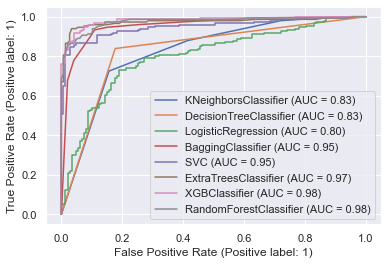

In [109]:
disp = plot_roc_curve(model1, X_test, Y_test)
plot_roc_curve(model2, X_test, Y_test, ax = disp.ax_)
plot_roc_curve(model3, X_test, Y_test, ax = disp.ax_)
plot_roc_curve(model4, X_test, Y_test, ax = disp.ax_)
plot_roc_curve(model5, X_test, Y_test, ax = disp.ax_)
plot_roc_curve(model6, X_test, Y_test, ax = disp.ax_)
plot_roc_curve(model8, X_test, Y_test, ax = disp.ax_)
plot_roc_curve(model9, X_test, Y_test, ax = disp.ax_)
plt.legend(prop = {'size':11}, loc = 'lower right')
plt.show()

#### * From the above we observe that accuracy, cv score & AUC of ExtraTreeClassifier is maximum, hence we consider it to be our best model and we shall now tune its hyperparameter to check if it gives better results.

## HyperParameter Tunning :

### Tunning ExtraTreeClassifier

In [111]:
clf1 = ExtraTreesClassifier()

In [112]:
params = {'max_depth' : (4,8,12,16), 'min_samples_split':(4,8,12,16),'criterion':['gini', 'entropy'], 
          'n_estimators' : [5,25,100,125], 'max_features':['sqrt', 'log2']}

In [113]:
grd1 = GridSearchCV(clf1, param_grid = params, n_jobs = -1)

grd1.fit(X_train, Y_train)

GridSearchCV(estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': (4, 8, 12, 16),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': (4, 8, 12, 16),
                         'n_estimators': [5, 25, 100, 125]})

In [114]:
print("Best Parameters =" ,grd1.best_params_)

Best Parameters = {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'log2', 'min_samples_split': 4, 'n_estimators': 25}


In [124]:
xt_clf = ExtraTreesClassifier(max_depth = 16, min_samples_split = 4, 
                              criterion = 'entropy', n_estimators = 125, max_features = 'log2', random_state = 384)

In [126]:
model11 = xt_clf()
func(model11, X_train,Y_train,X_test,Y_test)

training confucion matrix [[593   0]
 [  0 591]]
testing confucion matrix [[140   7]
 [  8 141]]
test                precision    recall  f1-score   support

           0       0.95      0.95      0.95       147
           1       0.95      0.95      0.95       149

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296

training                precision    recall  f1-score   support

           0       1.00      1.00      1.00       593
           1       1.00      1.00      1.00       591

    accuracy                           1.00      1184
   macro avg       1.00      1.00      1.00      1184
weighted avg       1.00      1.00      1.00      1184

cross_val_score [0.86824324 0.875      0.94256757 0.95608108 0.95945946]
cross_val_score Mean 0.922972972972973


#### * After HyperParameter tunning of the above models we conclude that ExtraTreeClassifier is our best model and its accuracy and cv score has increased.

### Saving the model

In [127]:
# Saving the model using joblib :

import joblib

  
# Save the model as a pickle in a file

joblib.dump(model11,'InsuranceFraud.pkl')

['InsuranceFraud.pkl']

In [128]:
#saving the predicted as csv

joblib.dump(model11,'InsuranceFraud.csv')

['InsuranceFraud.csv']

In [129]:
#lets call the model and predict it:

x=joblib.load('InsuranceFraud.csv')
x.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1])